In [1]:
import h5py, sys, os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from datetime import datetime
from scipy import ndimage

%matplotlib widget

from jfunctions import *

In [2]:
#Load simulation data
b, w, times = load_data('th1_xz', 'w_xz')
NSAMP = len(times)

# Load simulation metadata
md = get_metadata()

# Load grids
gxf, gyf, gzf, dzf = get_grid(md)
gx, gy, gz, dz = get_grid(md, fractional_grid=False)

Keys: <KeysViewHDF5 ['epsilon_xy', 'epsilon_xz', 'epsilon_yz', 'kappa_t1_xy', 'kappa_t1_xz', 'kappa_t1_yz', 'kappa_t2_xy', 'kappa_t2_xz', 'kappa_t2_yz', 'nu_t_xy', 'nu_t_xz', 'nu_t_yz', 'omegaX_xy', 'omegaX_xz', 'omegaX_yz', 'omegaY_xy', 'omegaY_xz', 'omegaY_yz', 'omegaZ_xy', 'omegaZ_xz', 'omegaZ_yz', 'th1_xy', 'th1_xz', 'th1_yz', 'th2_xy', 'th2_xz', 'th2_yz', 'u_xy', 'u_xz', 'u_yz', 'v_xy', 'v_xz', 'v_yz', 'w_xy', 'w_xz', 'w_yz']>


In [3]:
print(md)

{'LX': 0.6, 'LY': 0.6, 'LZ': 0.6, 'RE': 10000000000.0, 'nu': 1e-10, 'SAVE_MOVIE_DT': 0.25, 'SAVE_STATS_DT': 0.25, 'NU_START': 1e-09, 'SAVE_FLOW_DT': 30.0, 'VERSION': 3.9, 'NU_START_TIME': 10.0, 'SAVE_STATS_DT_FINE': 0.1, 'FINE_RES_TIME': 5.0, 'TIME_LIMIT': 25.0, 'r0': 0.005, 'alpha_e': 0.1, 'b0': 0.2, 'Lyc': 0.02, 'Lyp': 0.01, 'S_depth': 0.1, 'N2': 0.5, 'H': 0.2, 'b_factor': 0.4, 'Nb': 256.0, 'Nphi': 256.0, 'F_TYPE': 3.0, 'Nx': 512, 'Ny': 512, 'Nz': 513, 'Nth': 2}


In [4]:
#Create grid
X, Y = np.meshgrid(gx, gz)
Xf, Yf = np.meshgrid(gxf, gzf)

print("Total time steps: %s"%NSAMP)
print("Dimensional times: ",times)


Total time steps: 230
Dimensional times:  [ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  0.    0.25
  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25
  3.5   3.75  4.    4.25  4.5   4.75  5.    5.1   5.2   5.3   5.4   5.5
  5.6   5.7   5.8   5.9   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7
  6.8   6.9   7.    7.1   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9
  8.    8.1   8.2   8.3   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1
  9.2   9.3   9.4   9.5   9.6   9.7   9.8   9.9  10.   10.1  10.2  10.3
 10.4  10.5  10.6  10.7  10.8  10.9  11.   11.1  11.2  11.3  11.4  11.5
 11.6  11.7  11.8  11.9  12.   12.1  12.2  12.3  12.4  12.5  12.6  12.7
 12.8  12.9  13.   13.1  13.2  13.3  13.4  13.5  13.6  13.7  13.8  13.9
 14.   14.1  14.2  14.3  14.4  14.5  14.6  14.7  14.8  14.9  15.   15.1
 15.2  15.3  15.4  15.5  15.6  15.7  15.8  15.9  16.   16.1  16.2  16.3
 16.4  16.5  16.6  16.7  16.8  16.9  17.   17.1  17.2  17.3  17.4  17.5
 17.6  17.7  17.8  1

In [5]:
w_filtered = np.zeros_like(w)
b_filtered = np.zeros_like(b)

for i in range(NSAMP):
    w_filtered[i] = ndimage.gaussian_filter(w[i], 2)
    b_filtered[i] = ndimage.gaussian_filter(b[i], 2)

w = w_filtered

N2 = np.gradient(b_filtered, gzf, axis=1)
N2t = np.gradient(N2, times, axis=0)

Setting up data arrays...


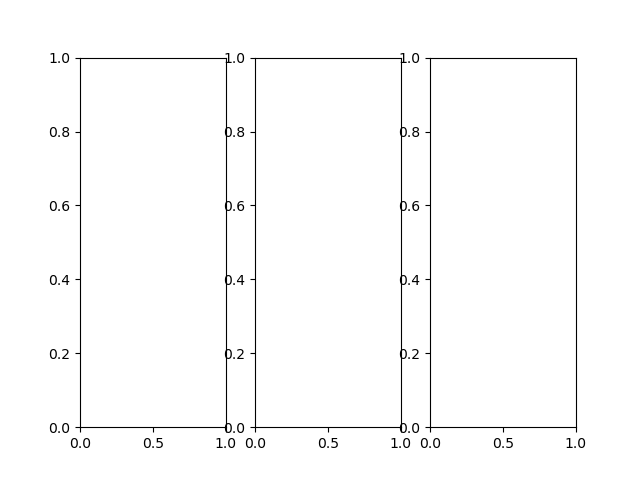

In [6]:
print("Setting up data arrays...")
fig, axs = plt.subplots(1,3)
ims = np.array([None,None,None])
cb = np.array([None,None,None])

In [7]:
print("Setting up initial plot...")
ims[0] = axs[0].pcolormesh(X, Y, b[-1], cmap='jet')
ims[1] = axs[1].pcolormesh(X, Y, w[-1], cmap='bwr')
ims[2] = axs[2].pcolormesh(X, Y, N2t[-1], cmap='bwr')

# Add forcing level
axs[0].axhline(md['Lyc']+md['Lyp'],color='white', linestyle=':')
axs[1].axhline(md['Lyc']+md['Lyp'],color='white', linestyle=':')
axs[2].axhline(md['Lyc']+md['Lyp'],color='white', linestyle=':')

cb[0] = plt.colorbar(ims[0],ax=axs[0])
cb[1] = plt.colorbar(ims[1],ax=axs[1])
cb[2] = plt.colorbar(ims[2],ax=axs[2])

ims[0].set_clim(0, 0.5)
ims[1].set_clim(-0.0005, 0.0005)
ims[2].set_clim(-0.1, 0.1)

fig.suptitle("time = 0 secs")
axs[0].set_ylabel("$z$")
axs[1].set_ylabel("$z$")
axs[2].set_ylabel("$z$")
axs[0].set_xlabel("$x$")
axs[1].set_xlabel("$x$")
axs[2].set_xlabel("$x$")

axs[0].set_ylim(0, 3*md['H'])
axs[1].set_ylim(0, 3*md['H'])
axs[2].set_ylim(0, 3*md['H'])

axs[0].set_aspect(1)
axs[1].set_aspect(1)
axs[2].set_aspect(1)

axs[0].set_title(r"$b$")
axs[1].set_title(r"$w$")
axs[2].set_title(r"$\partial_{zt}b$")

def animate(step):
    ims[0].set_array(b[step].ravel())
    ims[1].set_array(w[step].ravel())
    ims[2].set_array(N2t[step].ravel())
    fig.suptitle("time = {0:.2f} secs".format(times[step]))

    return ims.flatten(),

Setting up initial plot...


Initialising mp4 writer...
Starting plot...


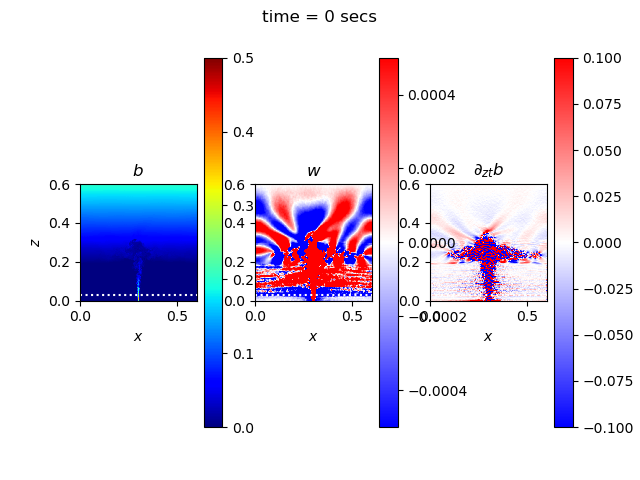

In [8]:
print("Initialising mp4 writer...")
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, bitrate=1800)

print("Starting plot...")
anim = animation.FuncAnimation(fig, animate, interval=500, frames=NSAMP, repeat=True)
now = datetime.now()
plt.show()